# Prosper Loan Data Exploration
## by Emmanuel Momoh

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling
> In this stage, I will access, clean and perform some feature engineering so as to make data ready for proper visualization


In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sb
sb.set_style('darkgrid')
sb.set(rc={'figure.figsize':(11,7)})
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

%matplotlib inline

In [26]:
#lading the dataset and describing its properties
df = pd.read_csv('loan.csv')

In [27]:
# high-level overview of data shape and composition
print(df.info())
print(df.shape)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [28]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> There are 113,937 loan records in the dataset with 81 features such as `credit grade`, `loan status`, `employment status`  etc.

### What is/are the main feature(s) of interest in your dataset?

> I'm partcularly interested in figuring out which features have effect on Loan status of the borrowers for example;
* Do borrowers who are currently employed as at time of lsiting tend to have their loan completed compared to others?
* How does `CreditGrade` affect loan status?
* Where do most of the borrowers live and what do they do?

> These are just a few variable amongst many we are going to explore.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I have a hunch that `CreditGade`and `EmploymentStatus` will have the strongest effect on `LoanStatus`: The company will definitely feel safer lending someone who is employed or self employed compared to someone who is not. Also CreditGrade is also a crucial factor that lenders consider before giving out a loan, I expect that borrowers with good credit score to have most of their loans completed.

## Univariate Exploration

> What is the most common loan status amongst borrowers?

In [29]:
# Lets look at this in terms of count before turning into visuals
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

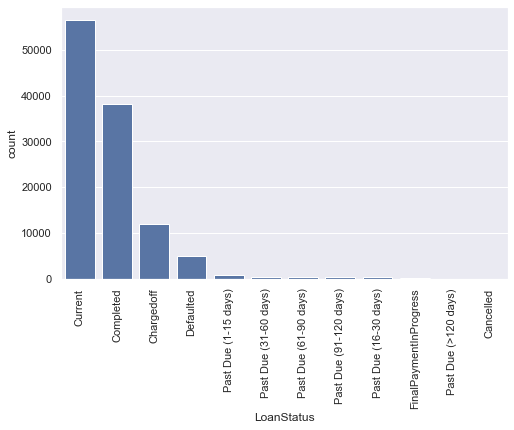

In [30]:
#setting default method and color to avoid code duplication

def x_y_t(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
base_color=sb.color_palette()[0]
plt.figure(figsize=[8, 5])
ord_list=df.LoanStatus.value_counts().index
sb.countplot(data=df, x='LoanStatus',color=base_color,order=ord_list)
plt.xticks(rotation=90);

In [31]:
# Most of the lower values are practically invisible, so lets use a log plot on the y-axis 

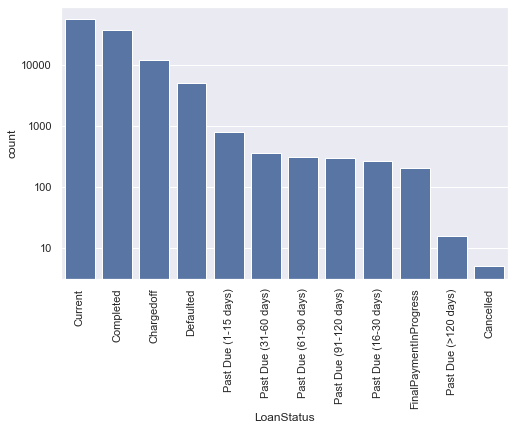

In [32]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='LoanStatus', color=base_color, order=ord_list)
plt.xticks(rotation=90)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show();




> From the barchart above, we can observe that most of customers seem to have their loans on current, this is immediately followed by customers that have completely paid their loans, we only have a few number of cancelled loans.

Secondly, lets take a look at the distribution of `ProsperScore`, this is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Note : This is only applicable for loans originated after July 2009.

In [33]:
# Since this variable is only applicable to loans originated after JULY 2009, Lets create a seperate dataframe to see the distribution.
df1 = df.query('LoanOriginationDate > "2009-07-31 00:00:00"')

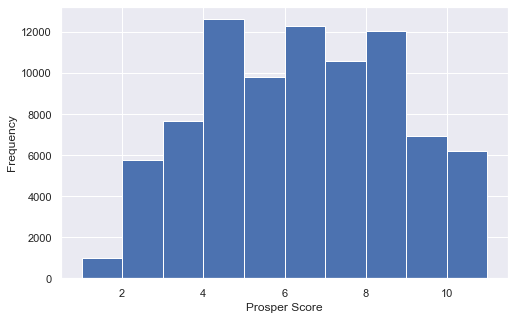

In [34]:
#now lets take alook at the distribution of prosperscore amongst borrowers
plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'ProsperScore')
plt.xlabel('Prosper Score')
plt.ylabel('Frequency')
plt.show()

>From the distribution above, most customers seem to have prosperscore of 4 , 6 and then 8. Only a few customers have low prosperscore

Next Let's Check out what state most of the borrowers reside

In [35]:
st_order= df.BorrowerState.value_counts().index

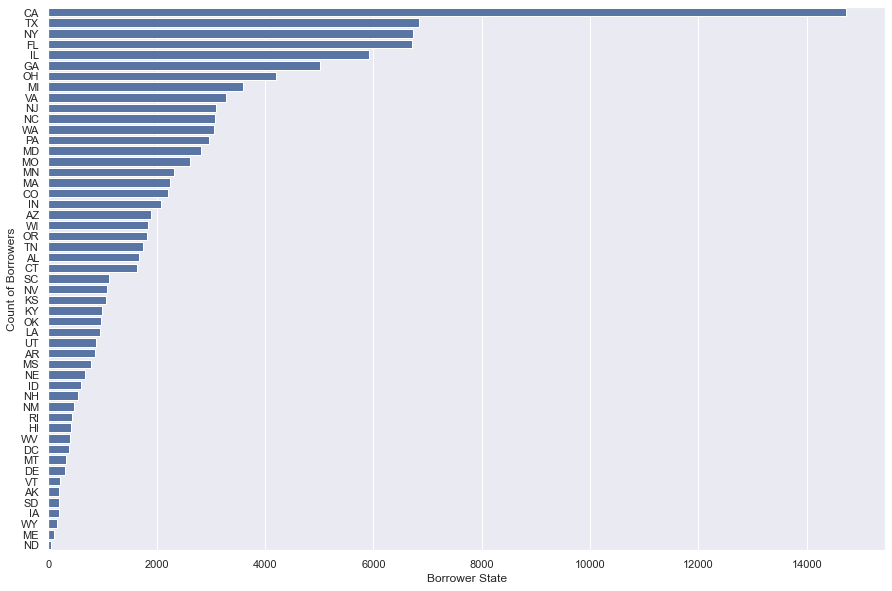

In [36]:
plt.figure(figsize=[15, 10])
sb.countplot(data=df, y='BorrowerState', color=base_color, order=st_order)
plt.xlabel('Borrower State')
plt.ylabel('Count of Borrowers');

> Seems a huge number of borrowers reside in California, Newyork and Texas, with the least being North Dakoda and Nebraska

We might also want to see the distrbution between borrowers who own homes and those who do not, so lets check that out

In [37]:
df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

Text(0.5, 1.0, 'Home Owners VS Non Home Owners(Borrowers)')

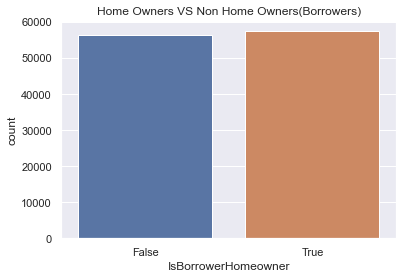

In [38]:

sb.countplot(x='IsBorrowerHomeowner', data=df)
sb.set(rc = {'figure.figsize':(10,8)})
plt.title('Home Owners VS Non Home Owners(Borrowers)')

> There's just a little bit difference between borrowers who own homes and those who donot, The number of borrowers who own homes is slightly more than those who donot

Lastly lets look at how borrowers have used ProsperLoan services over the years

In [39]:
#Checking datatype for Loan Origination date column
df.LoanOriginationDate.dtypes

dtype('O')

In [40]:
#The Loan Origination date column is saved as an object so we convert to datetime

In [41]:
df['LoanOriginationDate'] =  pd.to_datetime(df['LoanOriginationDate'])

In [42]:
#Lets create Columns for day, month and year

df['day'] = df['LoanOriginationDate'].dt.day
df['month'] = df['LoanOriginationDate'].dt.month
df['year'] = df['LoanOriginationDate'].dt.year

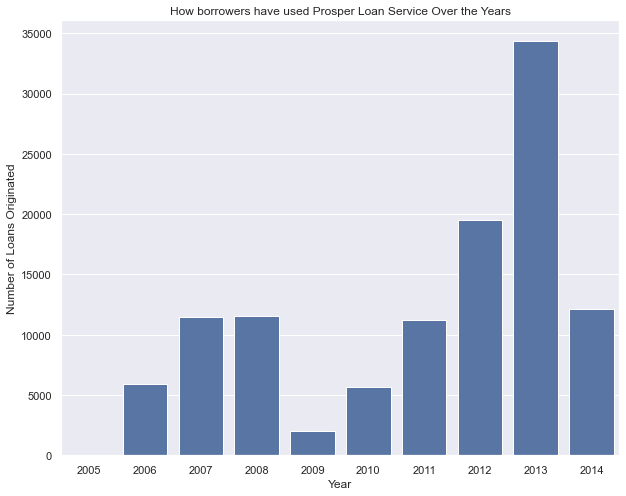

In [43]:
sb.countplot(data=df, x='year',color=base_color)
plt.xlabel('Year')
plt.ylabel('Number of Loans Originated')
plt.title('How borrowers have used Prosper Loan Service Over the Years');

> From the chart above, we can see that 2013 had the highest number of loans originated,meanwhile there was a sharp decline in 2009

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Loanstatus variables had comparatively large set of values with each other that some variable were almost invisible using a normal plot, hence i looked at the data using a log transform.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To understand how borrowers used prosper loan services over the years, i had to convert the `LoanOriginationDate`into a datetime data type (which was previous saved as object), and then seperate the columns into day, month and year.


## Bivariate Exploration

> To start with, I want to look at the relationship between `ProsperScore` and `IncomeRange`. Do borrowers with high income range have higher prosperscore? 

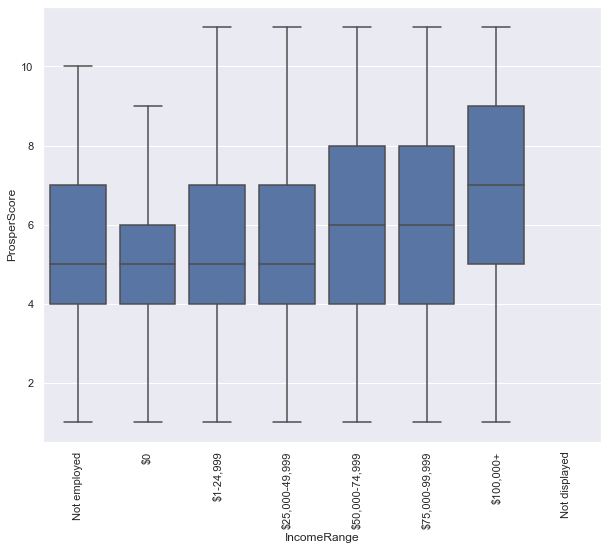

In [44]:
# First, I'll set the classes of income range in order
sal_classes = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']

# This returns the income_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
sclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sal_classes)

# Use pandas.astype() to convert the "IncomeRange" column from a plain object type into an ordered categorical type 
df['IncomeRange'] = df['IncomeRange'].astype(sclasses);

sb.boxplot(data=df, x='IncomeRange',y='ProsperScore', color=base_color,)
sb.set(rc={'figure.figsize':(10,7)})
plt.xticks(rotation=90);

> It appears my assumption was correct, borrowers earning $100,000+ tend to have higher prosper scores than the rest

Next, lets Look at the relationship or correlation between number of days delinquent(days defaulted) and prosperscore

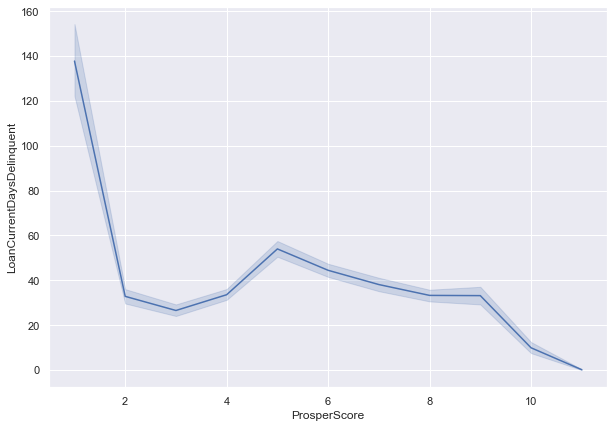

In [45]:
sb.lineplot(data=df, x='ProsperScore', y= 'LoanCurrentDaysDelinquent');

> From the Line chart above, we can see those with high number of delinquent have very low Prosper and vice-versa. Therefore, its safe to say borrowers with high prosper score hardly default in loan repayment

Now, Lets see which of the states borrows the highest amount of loan from Prosperloan service

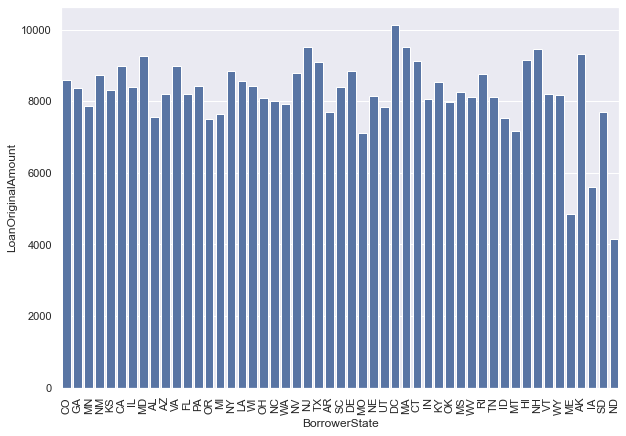

In [46]:
sb.barplot(data=df, x='BorrowerState', y= 'LoanOriginalAmount', color=base_color,ci=None)
sb.set(rc={'figure.figsize':(13,10)})
plt.xticks(rotation=90);

>District of Columbia (DC) seems to be the State with the higest amount of loan

Lets See how Prosper rating is distributed amongst Employement Status and Income range

In [47]:
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

Next, See how prosoer Rating is distributed in terms of Employement Status, Income Range and IsBorrowerHomeowner

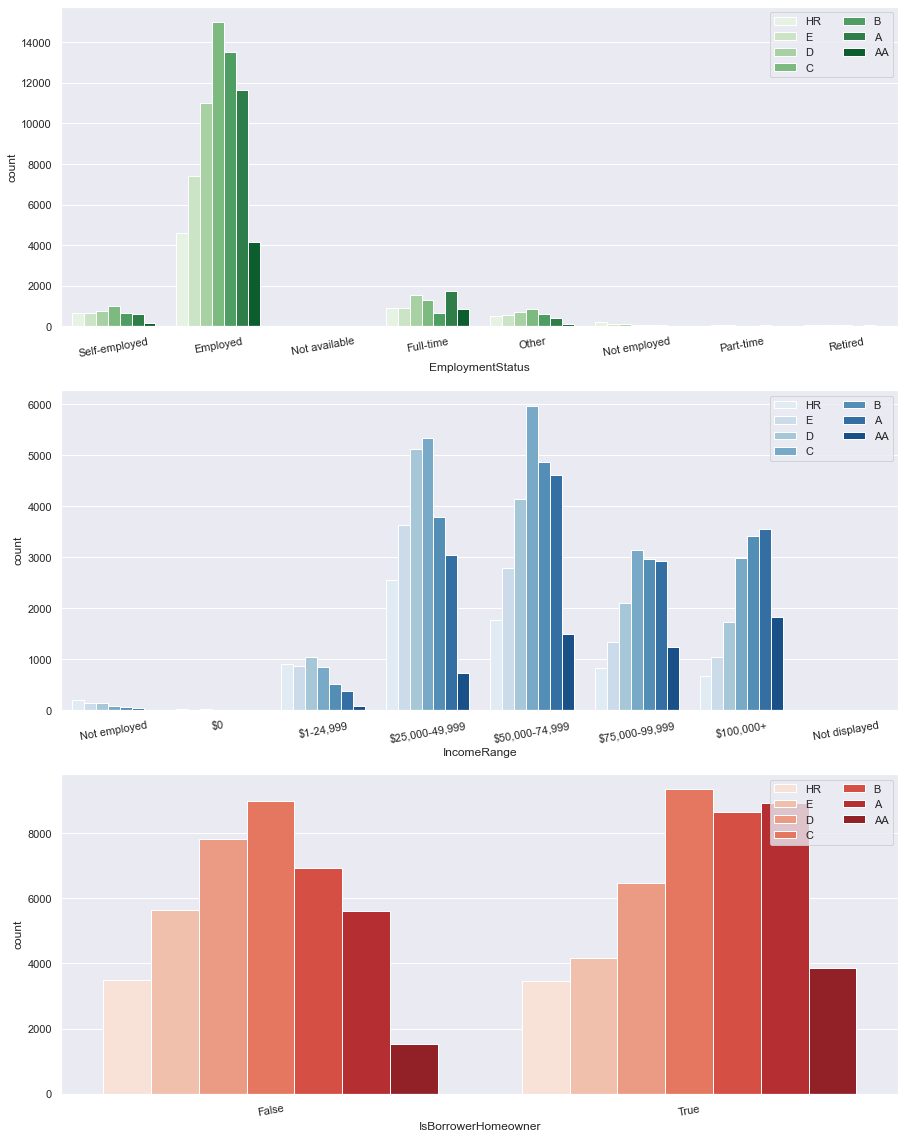

In [48]:
# First, Lets convert ProsperRating into ordered categorical types
rate_classes = ['HR','E','D','C','B','A','AA']

# This returns the income_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
rclasses = pd.api.types.CategoricalDtype(ordered=True, categories=rate_classes)

# Use pandas.astype() to convert the "IncomeRange" column from a plain object type into an ordered categorical type 
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(rclasses);
plt.figure(figsize = [15, 20])

# subplot 1: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);


# subplot 2: Prosper rating vs. IncomeRange, use different color palette
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);


# subplot 3: Prosper rating vs. IncomeRange, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'IsBorrowerHomeowner', hue = 'ProsperRating (Alpha)', palette = 'Reds')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

> From the First plot, we observe that borrowers who are employed tend to have higher Prosper Ratings than others

> On the second plot, Borrowers earning $100,000+ are associated with high prosper rating also, so we might say higher income earners tend to have high propser ratings

> Lastly, On the third plot, Home owners tend to have higher prosper ratings than non-home owners

Lastly,Lets look at the pairwise relationship present between some numeric variables in the data.

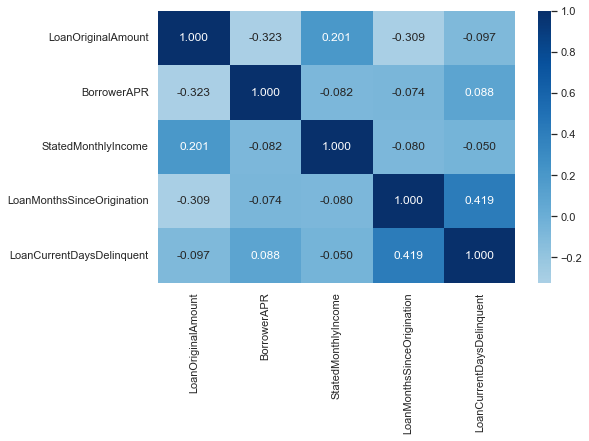

In [49]:
# lets create a set of numeric variables to work with

num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','LoanMonthsSinceOrigination','LoanCurrentDaysDelinquent']

#Plotting a heatmap to see these correlations

plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'Blues', center = 0);

> We can see that the loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

> Also Current Days of Delinquent equally correlates positively with number of months since loan originated.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the plots above the following can be deduced from the investigation

* Higher income is associated with higher prosper score this might be because, high income earners could easily pay off depts compared to low income earners and early repayments would probably be one of the factors considered in alloting prosper score

* Also on Prosperscore, as observed in the previous investigation, Borrowers with higher prosper score have very little loan default history

* Most borrowers are from District Of Columbia

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, Home owners and Employed Borrowers Tend to have higher prosper ratings compared to others

## Multivariate Exploration

> First Lets look at Relationship between Income Range and ProsperScore, and then how this is distributed between home Owners and non-Home owners

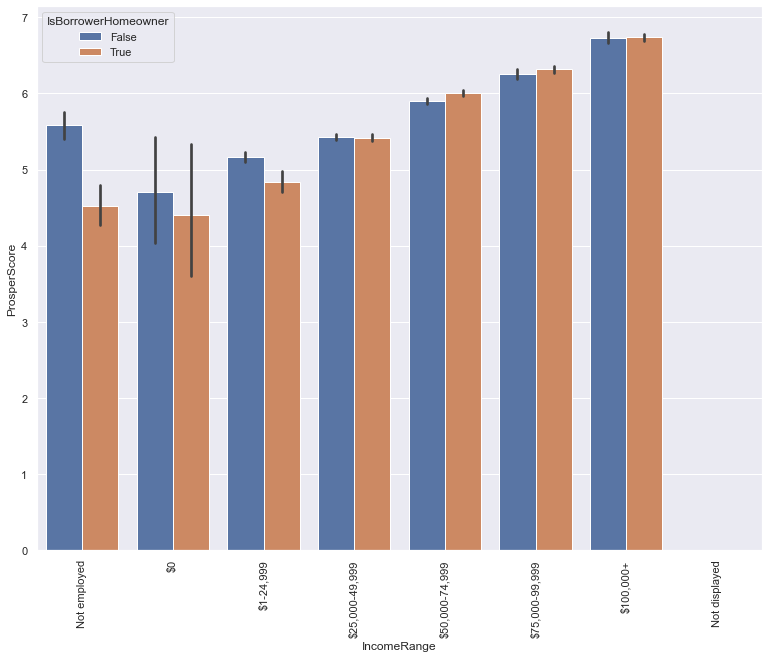

In [50]:
sb.barplot(data=df, x='IncomeRange',y='ProsperScore', hue='IsBorrowerHomeowner')
sb.set(rc={'figure.figsize':(10,7)})
plt.xticks(rotation=90);

> As we can see from the plot, ProsperScore and Home owner's Status is almost evenly distributed between all categories of income range except for those that are not employed, those with no imcome and income range from $1-24,999. These set of borrowers tend to have non-home owners popuplar amongst them

Next, Lets see IsBorrowerHomeowner VS LoanCurrentDaysDelinquent VS ProsperScore

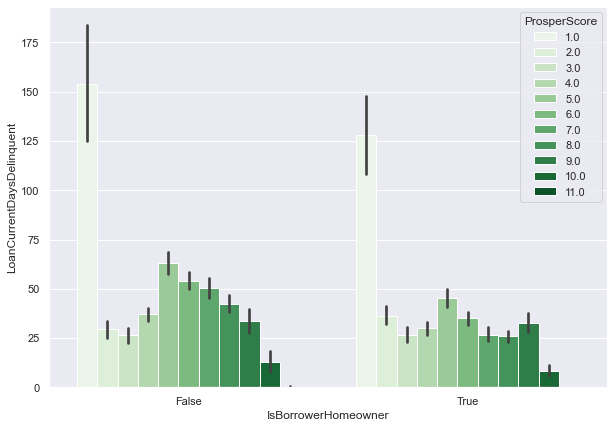

In [51]:
sb.barplot(data=df, x='IsBorrowerHomeowner', y= 'LoanCurrentDaysDelinquent', hue='ProsperScore', palette='Greens');

We can see first that Non home owners tend to have higher Number of days delinquent than home owners, and then Prosper score for both Home Owners and Non Increases as number of days delinquent decreases

Lets see how belonging to a group relates with IncomeRange and prosper score

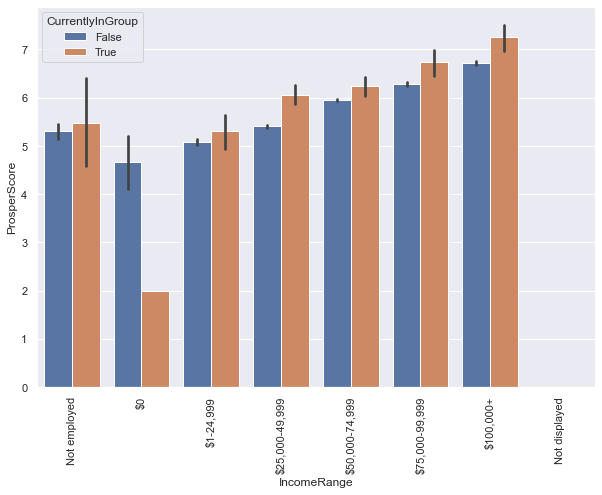

In [52]:
sb.barplot(data=df, x='IncomeRange',y='ProsperScore', hue='CurrentlyInGroup')
plt.xticks(rotation=90);

From the barplot above we observe that most of the users under income range are in a group, except for those earning nothing i.e $0

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From this part of the investigation, I observed that home owners are almost evenly distributed between each Income range with except for those that are umemployed and those earning nothing

> Non Home Owners tend to have a high loan default history

> Finally, most of the users under income range are in a group, except for those earning nothing


### Were there any interesting or surprising interactions between features?

> Yes, I observed that Non-Home Owners tend to have more prosper rating of 11, than Home Owners. This maybe implies that owning a home is not a factor that has a direct proportionality with prosper score

## Conclusions
>Below are some of the conclusions that can be drawn from this investigation

* Number of loan Originated increased over time

* There seem to be more current loans than any of other loan statuses

* The Days of delinquent has a negative relationship with prosperscore (though Prosper score is an ordinal variable)

* Finally, stated monthly income has a positive relationship with loan amount originated, this is expected because borrowers with higher monthly income will tend to receive higher loan amount



